              Rooms  Living Space (sqm)         Price  Price_per_SquareMeter
count  12554.000000        12554.000000  1.255400e+04           12554.000000
mean       2.245340          159.693882  1.514168e+06           14466.291004
std        0.556127          113.584864  1.227139e+06           13583.902006
min        1.500000            3.000000  2.000000e+00               0.009524
25%        2.000000          120.000000  8.466000e+05            6536.214286
50%        2.500000          150.000000  1.182750e+06            9108.157895
75%        2.500000          200.000000  1.774120e+06           17430.000000
max       17.000000          990.000000  1.904850e+07          269333.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12554 entries, 0 to 12553
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                12554 non-null  object 
 1   Title                  12554 non-null 

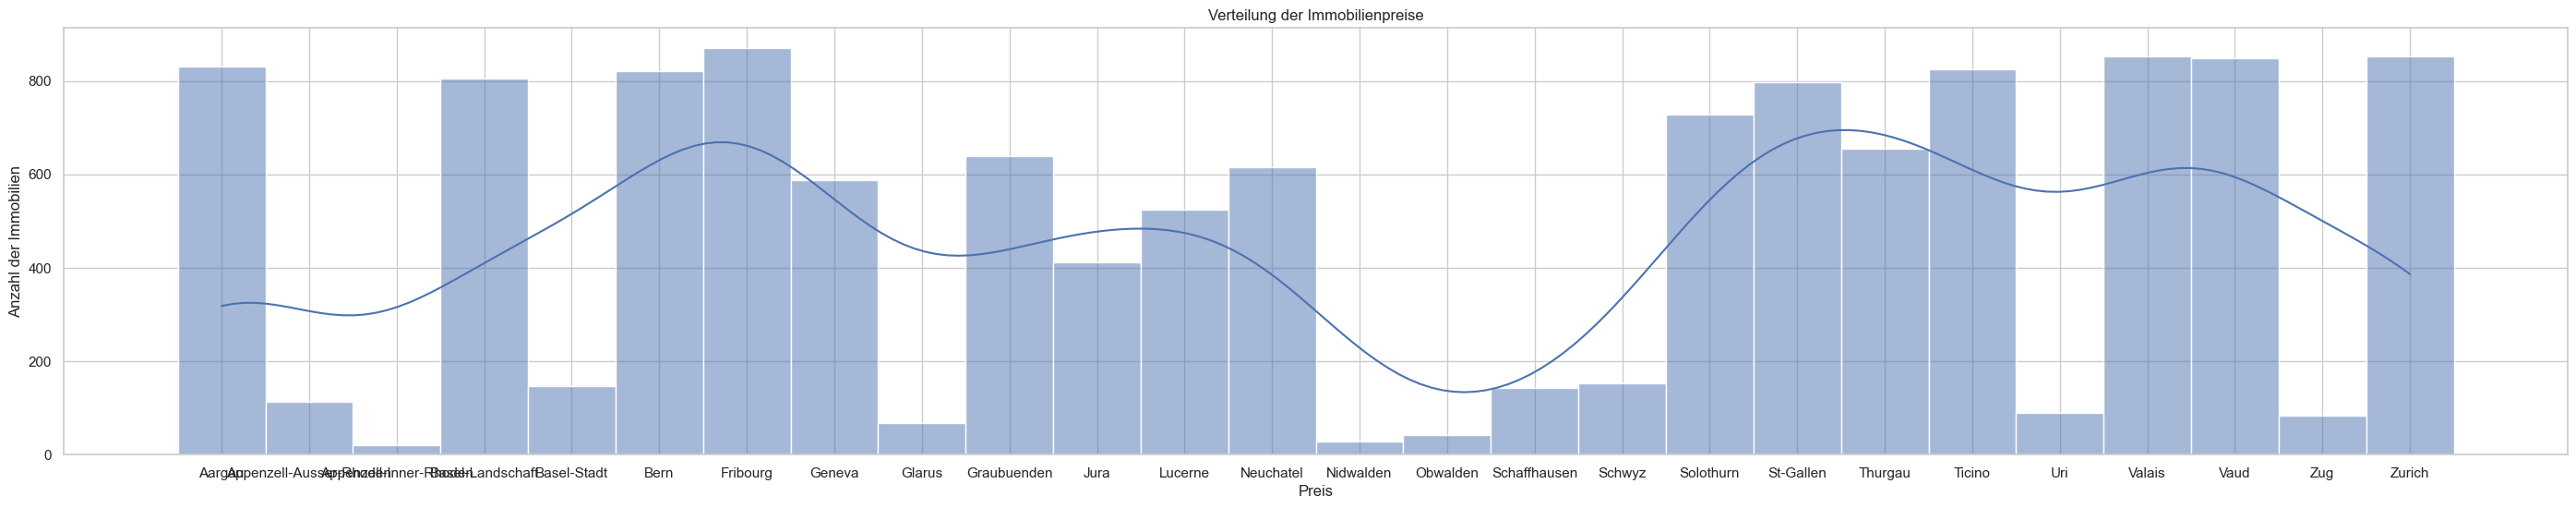

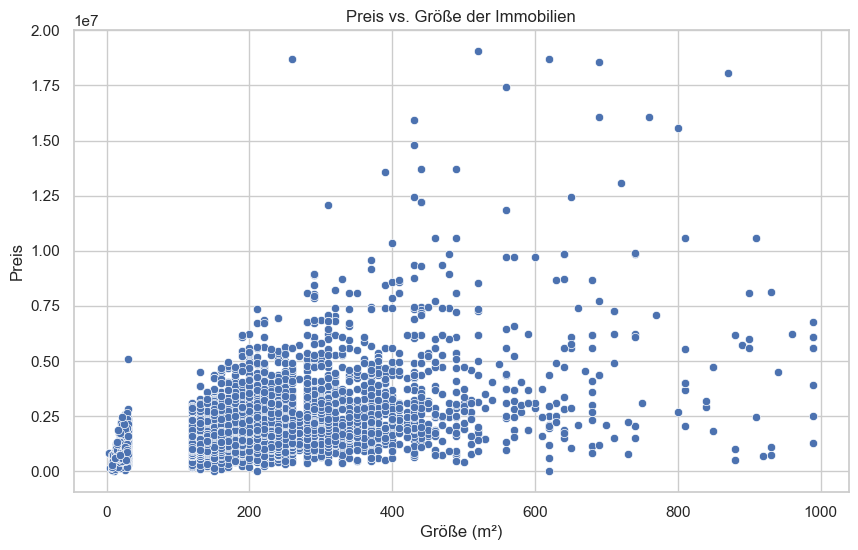

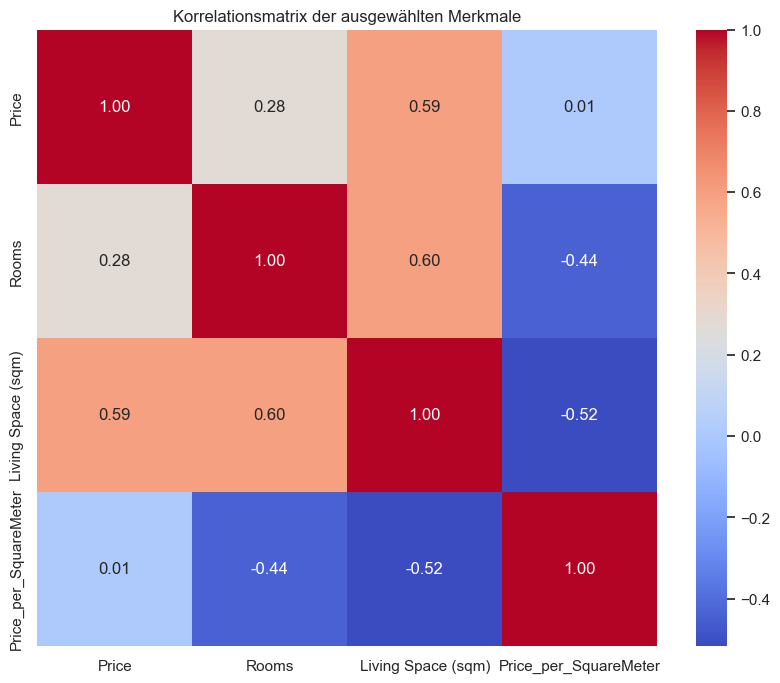

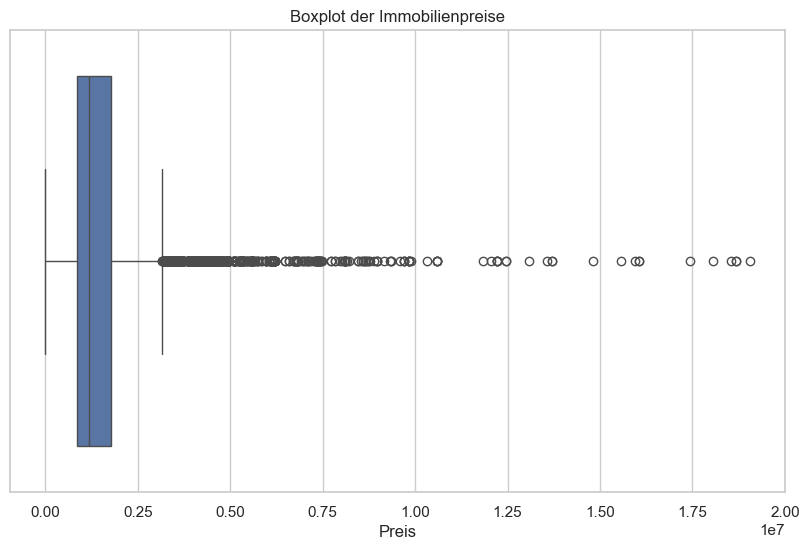

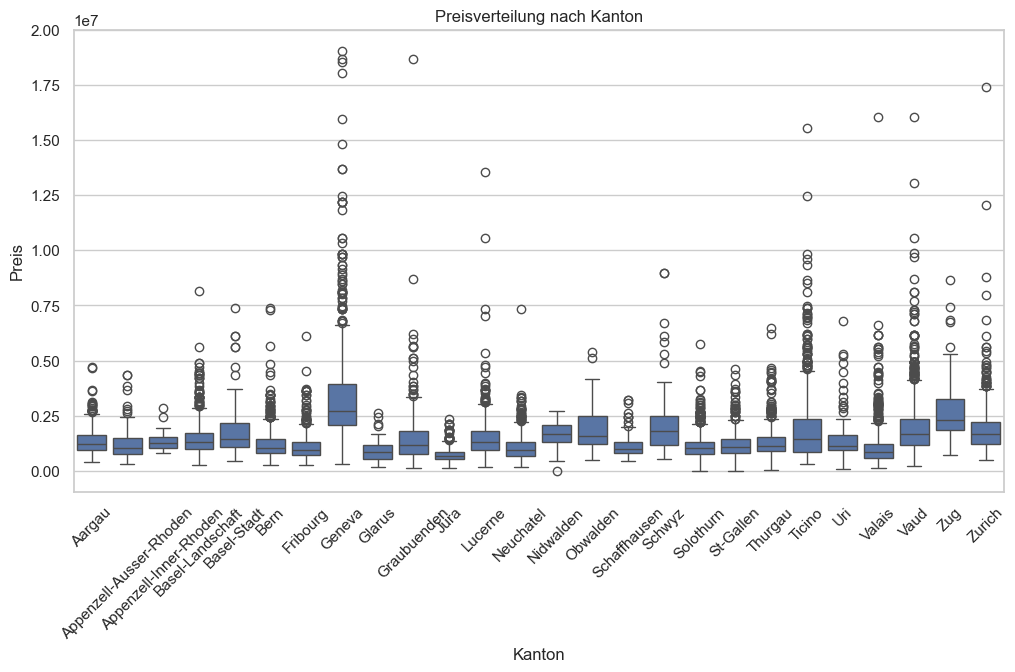

Canton
Geneva                     2.250047e+06
Zug                        2.058426e+06
Zurich                     1.696095e+06
Obwalden                   1.650279e+06
Schwyz                     1.645599e+06
Nidwalden                  1.633839e+06
Vaud                       1.614977e+06
Basel-Stadt                1.497567e+06
Lucerne                    1.412009e+06
Appenzell-Inner-Rhoden     1.400328e+06
Basel-Landschaft           1.355604e+06
Ticino                     1.350062e+06
Aargau                     1.323388e+06
Graubuenden                1.291883e+06
Thurgau                    1.250005e+06
Uri                        1.237908e+06
Bern                       1.157946e+06
St-Gallen                  1.156775e+06
Appenzell-Ausser-Rhoden    1.146963e+06
Schaffhausen               1.135328e+06
Solothurn                  1.123905e+06
Fribourg                   1.044810e+06
Neuchatel                  1.042558e+06
Valais                     9.835082e+05
Glarus                     9.3329

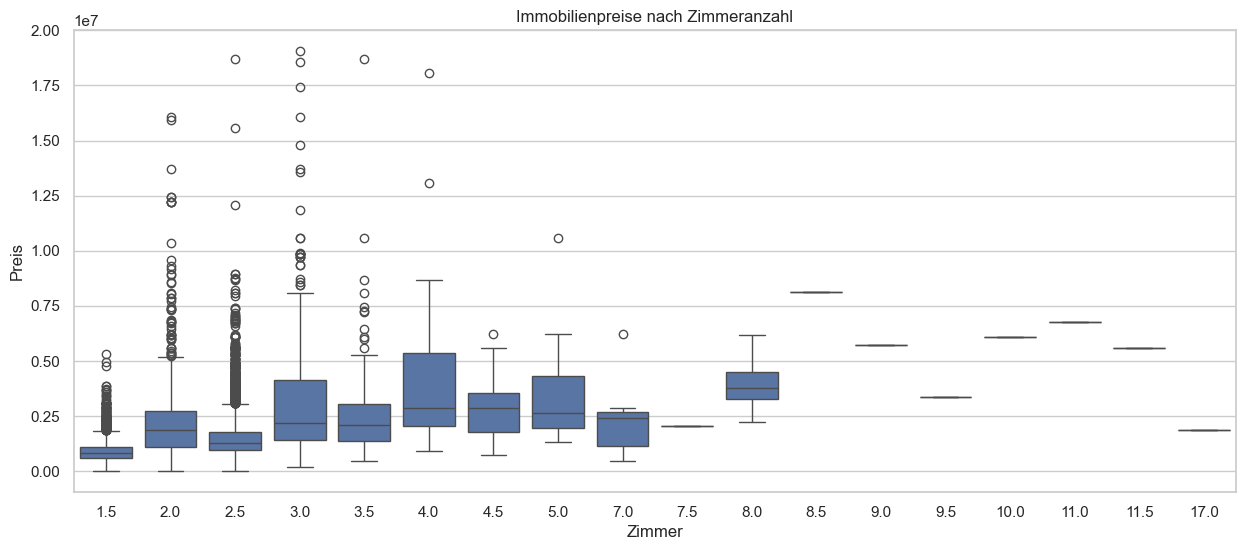

In [3]:
#Datenanalyse und Visualisierung
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df_clean = pd.read_csv('new_merged_cleaned_immoscout24.csv', sep=';')
df_filtered= pd.read_csv('new_merged_filtered_immoscout24.csv', sep=';')
# Stil für die Plots festlegen
sns.set(style="whitegrid")

print(df_clean.describe())
print(df_clean.info())

max_price = df_clean['Price'].max()
print("Maximaler Preis im Datensatz: ", max_price)

# Histogramm der Preise
plt.figure(figsize=(35, 6))
sns.histplot(df_clean['Canton'], kde=True)
plt.title('Verteilung der Immobilienpreise')
plt.xlabel('Preis')
plt.ylabel('Anzahl der Immobilien')
plt.show()

# Scatter Plot für Preis vs. Größe
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Living Space (sqm)', y='Price', data=df_clean)
plt.title('Preis vs. Größe der Immobilien')
plt.xlabel('Größe (m²)')
plt.ylabel('Preis')
plt.show()

# Korrelationsmatrix
relevant_columns = ['Price', 'Rooms', 'Living Space (sqm)', 'Price_per_SquareMeter']
correlation_matrix = df_clean[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix der ausgewählten Merkmale')
plt.show()


# Angenommen, Ihr DataFrame heißt df
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Price'])
plt.title('Boxplot der Immobilienpreise')
plt.xlabel('Preis')
plt.show()


# Überblick über die Preisverteilung nach Kanton
plt.figure(figsize=(12, 6))
sns.boxplot(x='Canton', y='Price', data=df_clean)
plt.xticks(rotation=45)
plt.title('Preisverteilung nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Preis')
plt.show()

# Durchschnittspreise nach Kanton berechnen
kanton_preise = df_filtered.groupby('Canton')['Price'].mean().sort_values(ascending=False)
print(kanton_preise)

# Boxplot für Preise nach Zimmerzah
plt.figure(figsize=(15, 6))
sns.boxplot(x='Rooms', y='Price', data=df_clean)
plt.title('Immobilienpreise nach Zimmeranzahl')
plt.xlabel('Zimmer')
plt.ylabel('Preis')
plt.show()

